In [93]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from PIL import Image, ImageDraw

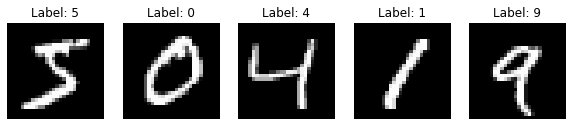

In [90]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Hide the axis
plt.show()

# x is data, y is labels

x_train, x_test = x_train / 255.0, x_test / 255.0 #normalise

x_train, x_test = x_train[..., tf.newaxis], x_test[..., tf.newaxis] #make 4d for cnn


In [100]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax"),
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1718 - accuracy: 0.9470 - val_loss: 0.0497 - val_accuracy: 0.9848
Epoch 2/5
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 0.0428 - val_accuracy: 0.9867
Epoch 3/5
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0418 - val_accuracy: 0.9887
Epoch 4/5
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 5/5
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0565 - val_accuracy: 0.9843


In [102]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9855
Test Accuracy: 0.9855


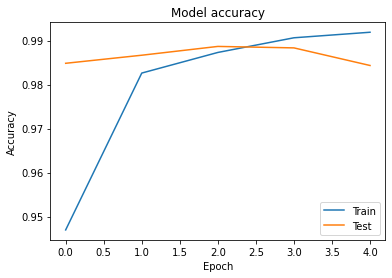

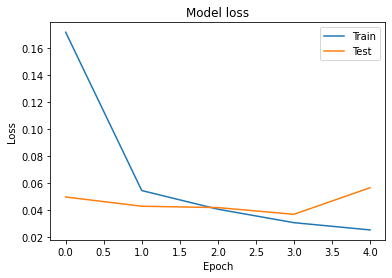

In [103]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()



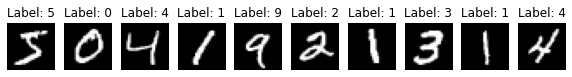

In [104]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1,10, i + 1)
    plt.imshow(x_train[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Hide the axis
plt.show()


In [105]:
image = x_train[4]
image = tf.expand_dims(image, axis=0)  # Shape (1, 3, 4)
print(image.shape)

guess = model(image)
print(guess.shape)

predicted_class = np.argmax(guess.numpy(), axis=1)
print("Predicted class:", predicted_class[0])



(1, 28, 28, 1)
(1, 10)
Predicted class: 9


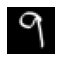

1/1 [==============================] - 0s 26ms/step
Predicted Digit: 9


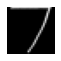

1/1 [==============================] - 0s 19ms/step
Predicted Digit: 7


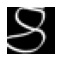

1/1 [==============================] - 0s 18ms/step
Predicted Digit: 3


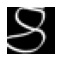

1/1 [==============================] - 0s 17ms/step
Predicted Digit: 3


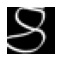

1/1 [==============================] - 0s 17ms/step
Predicted Digit: 3


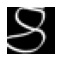

1/1 [==============================] - 0s 17ms/step
Predicted Digit: 3


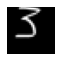

1/1 [==============================] - 0s 16ms/step
Predicted Digit: 9


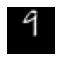

1/1 [==============================] - 0s 18ms/step
Predicted Digit: 7


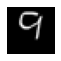

1/1 [==============================] - 0s 16ms/step
Predicted Digit: 9


In [108]:
class WhiteboardApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Draw a Digit")
        
        self.canvas = tk.Canvas(root, width=200, height=200, bg='white')
        self.canvas.pack()
        
        self.button_predict = tk.Button(root, text="Predict", command=self.predict_digit)
        self.button_predict.pack()
        
        self.button_clear = tk.Button(root, text="Clear", command=self.clear_canvas)
        self.button_clear.pack()
        
        self.canvas.bind("<B1-Motion>", self.paint)
        
        self.image = Image.new("L", (200, 200), color=255)
        self.draw = ImageDraw.Draw(self.image)
    
    def paint(self, event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", width=10)
        self.draw.line([x1, y1, x2, y2], fill="black", width=10)
    
    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (200, 200), color=255)
        self.draw = ImageDraw.Draw(self.image)
    
    def preprocess_image(self):
        # Resize to 28x28 pixels (the size used by MNIST)
        image_resized = self.image.resize((28, 28))
        
        # Invert colors (MNIST uses white on black)
        image_inverted = Image.eval(image_resized, lambda x: 255 - x)
        
        # Convert to numpy array and normalize
        image_array = np.array(image_inverted) / 255.0
        
        return image_array
    
    def predict_digit(self):
        # Preprocess the image
        processed_image = self.preprocess_image()

        plt.figure(figsize=(10, 5))
        plt.subplot(1,10, 1)
        plt.imshow(processed_image, cmap='gray')  # Use cmap='gray' for grayscale images
        plt.axis('off')  # Hide the axis
        plt.show()

        processed_image = processed_image.reshape(1, 28, 28, 1)
        
        # Predict using the model
        prediction = model.predict(processed_image)
        predicted_digit = np.argmax(prediction)
        
        # Display the result
        print(f"Predicted Digit: {predicted_digit}")
        tk.Message(self.root, text=f"Predicted Digit: {predicted_digit}", relief='raised').pack()

# Create the main window
root = tk.Tk()
app = WhiteboardApp(root)
root.mainloop()